### 【問題1】自作データセットでの分類の学習
### 【問題2】分類データセットに対するデータ拡張

Found 10 images belonging to 2 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten

/Users/monoknock/.pyenv/versions/anaconda3-2020.11/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
5/5 [==============================] - 1s 132ms/step - loss: 0.8835 - accuracy: 0.5000
Epoch 2/15
5/5 [==============================] - 1s 109ms/step - loss: 0.7952 - accuracy: 0.4000
Epoch 3/

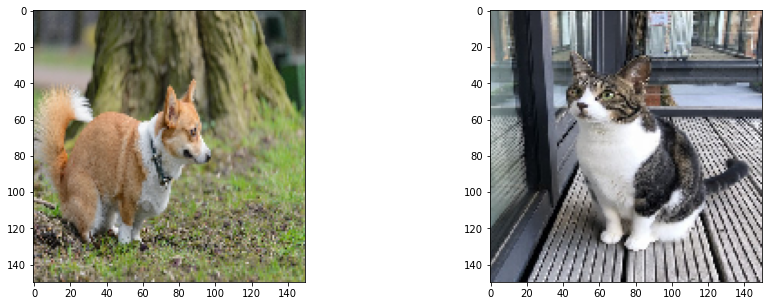

In [21]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import optimizers

batch_size = 2
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

image_generator = ImageDataGenerator(rescale=1./255)
gen_train = image_generator.flow_from_directory(
    batch_size=batch_size,
    directory="../data/sprint18/", # このディレクトリ配下のサブディレクトリをクラスとみなすので注意
    shuffle=True,
    target_size=(IMG_HEIGHT, IMG_WIDTH), # このサイズにリサイズされる
    class_mode='binary'
)

# train_data: shape(2, 150, 150, 3) (batch_size, IMG_HEIGHT, IMG_WIDTH, rgb)
# labels: [0. 0.]
train_data, labels = next(gen_train)
# train_data可視化
plt.figure(figsize=(15,5))
for i in range(len(train_data)):
    plt.subplot(1, 2, i+1) # plotの元を表示
    plt.imshow(train_data[i]) # 画像の表示


model = Sequential([
    Conv2D(16, 3, activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss="binary_crossentropy",
    optimizer=optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)
model.summary()
model.fit_generator(generator=gen_train, epochs=epochs)

### 【問題3】物体検出データセットの用意

環境構築(https://github.com/tzutalin/labelImg)
```
brew install qt libxml2 # brewかpipどちらかでインストールで良い
make qt5py3
python labelImg.py ../../diveintocode-ml/data/sprint18/cat
```


### 【問題4】物体検出データセットに対するデータ拡張


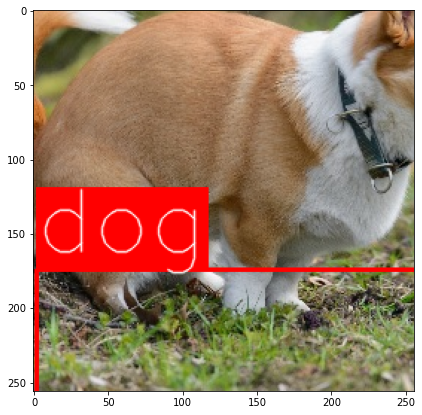

In [33]:
from PIL import Image
import numpy as np
import numpy  as np
import os
import glob
import re
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import albumentations as A

BOX_COLOR = (255, 0, 0)
TEXT_COLOR = (255, 255, 255)

def load_img(url):
    data = open(url,"rb").read()
    data = np.frombuffer(data, np.uint8)
    image = cv2.imdecode(data, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def visualize_bbox(img, bbox, class_id, class_idx_to_name, color=BOX_COLOR, thickness=2):
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    class_name = class_idx_to_name[class_id]
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 2, 1)
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(img, class_name, (x_min, y_min - int(0.3 * text_height)), cv2.FONT_HERSHEY_SIMPLEX, 2,TEXT_COLOR, lineType=cv2.LINE_AA)
    return img

def visualize(annotations, category_id_to_name):
    img = annotations['image'].copy()
    for idx, bbox in enumerate(annotations['bboxes']):
        img = visualize_bbox(img, bbox, annotations['category_id'][idx], category_id_to_name)
    plt.figure(figsize=(7, 7))
    plt.imshow(img)

image = load_img('../data/sprint18/dog/dog2.jpg')
image = np.array(image)

annotations = {'image': image, 'bboxes': [[1,107,427,374]], 'category_id': [1]}
category_id_to_name = {0: 'cat', 1: 'dog'}

aug = A.Compose([
    A.RandomCrop(width=256, height=256),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
])
augmented = aug(**annotations)
visualize(augmented, category_id_to_name)


